In [1]:
from tensorflow.keras.datasets   import boston_housing , mnist , fashion_mnist
from tensorflow.keras.models     import Sequential , clone_model , Model
from tensorflow.keras.layers     import Dense , Activation , InputLayer , Flatten , Input , BatchNormalization , Dropout , Embedding
from tensorflow.keras            import optimizers  
from tensorflow.keras.callbacks  import EarlyStopping , ModelCheckpoint , Callback
from tensorflow.keras.optimizers import SGD , Adam

# 자연어 처리
from tensorflow.keras.preprocessing.text          import Tokenizer
from tensorflow.keras.preprocessing.sequence      import pad_sequences

from keras.utils.np_utils      import to_categorical

from sklearn.datasets          import load_iris , load_breast_cancer , load_digits
from sklearn.model_selection   import train_test_split

import matplotlib.pyplot as plt

import numpy  as np
import pandas as pd
import tensorflow as tf 

In [2]:
import os

os.environ["0"]="0"
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3852555051864666564
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2920035124
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13830362198005681699
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 970, pci bus id: 0000:01:00.0, compute capability: 5.2"
 xla_global_id: 416903419]

#### 성능개선

- 가중치 초기화
- 활성화 함수 변경
- 옵티마이저 변경
- 정규화
- 드롭아웃

In [4]:
print('1. 데이터 세트 로드 - ')
print()

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)


1. 데이터 세트 로드 - 



(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankel boot

X_train[0] imshow() 시각화 - 


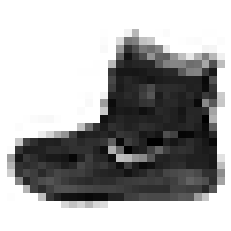



9


In [5]:
print('X_train[0] imshow() 시각화 - ')

plt.imshow(X_train[0],cmap = plt.cm.binary)

plt.grid(False)
plt.axis('off')
plt.show()
plt.close()
print()
print()
print(y_train[0])



In [6]:
print('02. 데이터 전처리 훈련/테스트 0.0 ~ 1.0 변환 - ')

X_train , X_test = X_train/255.0 , X_test/255.0



02. 데이터 전처리 훈련/테스트 0.0 ~ 1.0 변환 - 


In [7]:
print('03. 모델 구성 - Flatten - hidden(512 , relu) - output(10 , softmax) ')

fashion_model = Sequential()
fashion_model.add( Flatten( input_shape = (28, 28) ) )  
fashion_model.add( Dense(units = 512, activation = 'relu' ) )
fashion_model.add( Dense(units = 10 , activation = 'softmax') ) 


03. 모델 구성 - Flatten - hidden(512 , relu) - output(10 , softmax) 


In [8]:
print('04. 모델 컴파일 optimizer - adam , loss - sparse_categorical_crossentropy , metrics - accuracy')

fashion_model.compile(optimizer = 'Adam', 
                      loss= 'sparse_categorical_crossentropy' , 
                      metrics=['accuracy'] ) 





04. 모델 컴파일 optimizer - adam , loss - sparse_categorical_crossentropy , metrics - accuracy


In [9]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [10]:
print('05. 모델 훈련 - epochs 10회')
fashion_model.fit(X_train , y_train , epochs=10  , verbose = 1)



05. 모델 훈련 - epochs 10회
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4754 - accuracy: 0.8308
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3603 - accuracy: 0.8670
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3239 - accuracy: 0.8799
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2985 - accuracy: 0.8893
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2804 - accuracy: 0.8972
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2637 - accuracy: 0.9021
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2523 - accuracy: 0.9068
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2395 - accuracy: 0.9112
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2299 - accuracy: 0.9136
Epoch 10/10
1875/1875 [==============================] - 5s

In [11]:
print('06. 모델정확도 평가 - ')

loss , accuracy = fashion_model.evaluate(X_test,y_test)
print('loss     - ' , loss)
print('accuracy - ' , accuracy)

06. 모델정확도 평가 - 
313/313 [==============================] - 1s 3ms/step - loss: 0.3237 - accuracy: 0.8883
loss     -  0.3236647844314575
accuracy -  0.8883000016212463


In [12]:
print('07. 예측 - ')
y_pred = fashion_model.predict(X_test) 
print( y_pred[0])
print( np.argmax(y_pred[0]))

07. 예측 - 
[9.4006518e-11 7.1595271e-11 2.8795430e-11 4.0182091e-14 6.4533032e-12
 3.7517344e-05 2.4766381e-10 1.9089365e-03 4.5602153e-10 9.9805355e-01]
9


In [4]:
def basic_model() :
  
  fashion_model = Sequential()
  fashion_model.add( Flatten( input_shape = (28, 28) ) )  
  fashion_model.add( Dense(units = 512, activation = 'relu' ) )
  fashion_model.add( Dense(units = 10 , activation = 'softmax') )

  fashion_model.compile(optimizer = 'Adam', 
                      loss= 'sparse_categorical_crossentropy' , 
                      metrics=['accuracy'] ) 
  
  return fashion_model 

In [5]:
def hidden_layer_128_model() :
  
  fashion_model = Sequential()
  fashion_model.add( Flatten( input_shape = (28, 28) ) )  
  fashion_model.add( Dense(units = 128, activation = 'relu' ) )
  fashion_model.add( Dense(units = 10 , activation = 'softmax') )

  fashion_model.compile(optimizer = 'Adam', 
                      loss= 'sparse_categorical_crossentropy' , 
                      metrics=['accuracy'] ) 
  
  return fashion_model 

def hidden_layer_512_model() :
  
  fashion_model = Sequential()
  fashion_model.add( Flatten( input_shape = (28, 28) ) )  
  fashion_model.add( Dense(units = 512, activation = 'relu' ) )
  fashion_model.add( Dense(units = 10 , activation = 'softmax') )

  fashion_model.compile(optimizer = 'Adam', 
                      loss= 'sparse_categorical_crossentropy' , 
                      metrics=['accuracy'] ) 
  
  return fashion_model

def hidden_layer_1024_model() :
  
  fashion_model = Sequential()
  fashion_model.add( Flatten( input_shape = (28, 28) ) )  
  fashion_model.add( Dense(units = 1024, activation = 'relu' ) )
  fashion_model.add( Dense(units = 10 , activation = 'softmax') )

  fashion_model.compile(optimizer = 'Adam', 
                      loss= 'sparse_categorical_crossentropy' , 
                      metrics=['accuracy'] ) 
  
  return fashion_model

In [15]:
model_128 = hidden_layer_128_model()
history_128 = model_128.fit(X_train , y_train , epochs=10  , verbose = 1)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4961 - accuracy: 0.8251
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3730 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3332 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3102 - accuracy: 0.8869
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2938 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2779 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2683 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2580 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2491 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.240

In [ ]:
model_512 = hidden_layer_128_model()
history_512 = model_512.fit(X_train , y_train , epochs=10  , verbose = 1)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4984 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3724 - accuracy: 0.8649
Epoch 3/10
1031/1875 [===============>..............] - ETA: 2s - loss: 0.3396 - accuracy: 0.8754

In [ ]:
model_1024 = hidden_layer_128_model()
history_1024 = model_1024.fit(X_train , y_train , epochs=10  , verbose = 1)

In [6]:
print('각 모델의 에포크에 따른 정확도를 시각화 - ')

plt.figure(figsize=(20,10))

plt.plot(history_128.history['accuracy'],'s-',label='128')
plt.plot(history_512.history['accuracy'],'d-',label='512')
plt.plot(history_1024.history['accuracy'],'o-',label='1024')

plt.legend(loc='best')
plt.xticks(np.arange(10))
plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
plt.close()


각 모델의 에포크에 따른 정확도를 시각화 - 


NameError: name 'history_128' is not defined

<Figure size 1440x720 with 0 Axes>

In [7]:
print('각 모델의 에포크에 따른 손실을   시각화 - ')
plt.figure(figsize=(20,10))

plt.plot(history_128.history['loss'],'s-',label='128')
plt.plot(history_512.history['loss'],'d-',label='512')
plt.plot(history_1024.history['loss'],'o-',label='1024')

plt.legend(loc='best')
plt.xticks(np.arange(10))
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
plt.close()


각 모델의 에포크에 따른 손실을   시각화 - 


NameError: name 'history_128' is not defined

<Figure size 1440x720 with 0 Axes>

In [8]:
print('loss 가 에포크 수행시 줄어들지 않는다면 중지시킬 수 있다( Callback , EarlyStopping ) - ')

class UserCallback(Callback) :
  def on_epoch_end(self , epoch , logs={}) :
    if logs.get('loss') < 0.3 :
      print('훈련을 중지합니다~~~~~왜? 그냥')
      self.model.stop_training = True 

loss 가 에포크 수행시 줄어들지 않는다면 중지시킬 수 있다( Callback , EarlyStopping ) - 


In [9]:
callbacks = UserCallback()

In [ ]:
model_128 = hidden_layer_128_model()
history_128 = model_128.fit(X_train , y_train , epochs=10  , verbose = 1 , callbacks=[callbacks])


In [ ]:
callbacks = [ EarlyStopping(monitor = 'val_accuracy' , patience = 10 )]
model_128 = hidden_layer_128_model()
history_128 = model_128.fit(X_train , y_train , epochs=100  , validation_split = 0.3 ,  verbose = 1 , callbacks=[callbacks])

In [ ]:

def hidden_layer_128_activation_model() :
  
  fashion_model = Sequential()
  fashion_model.add( Flatten( input_shape = (28, 28) ) )  
  fashion_model.add( Dense(units = 128, activation = 'sigmoid' ) )
  fashion_model.add( Dense(units = 10 , activation = 'softmax') )

  fashion_model.compile(optimizer = 'Adam', 
                      loss= 'sparse_categorical_crossentropy' , 
                      metrics=['accuracy'] ) 
  
  return fashion_model 



In [ ]:
model_128 = hidden_layer_128_activation_model()
model_128.fit(X_train , y_train , epochs=10  , verbose = 1)

In [11]:
print('case01 - 01. 데이터 세트 로드 - ')
print()

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

case01 - 01. 데이터 세트 로드 - 



(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [12]:
print('행렬 형태는 퍼셉트론 모델의 피처로 사용이 부적합하다 - ')
print('1차원의 벡터로 변환 - ')
print('reshape 28 * 28 -> 784') 

X_train = X_train.reshape( X_train.shape[0] , -1)
X_test = X_test.reshape( X_test.shape[0] , -1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

행렬 형태는 퍼셉트론 모델의 피처로 사용이 부적합하다 - 
1차원의 벡터로 변환 - 
reshape 28 * 28 -> 784


In [13]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((60000, 784), (60000, 10)), ((10000, 784), (10000, 10)))

In [14]:
def fashion_mnist_model() :
  fashion_model = Sequential()
  fashion_model.add( Dense(units = 50, activation = 'sigmoid'  , input_shape = (784, ) ) )
  fashion_model.add( Dense(units = 50, activation = 'sigmoid' ) )
  fashion_model.add( Dense(units = 50, activation = 'sigmoid' ) )
  fashion_model.add( Dense(units = 50, activation = 'sigmoid' ) )

  fashion_model.add( Dense(units = 10 , activation = 'softmax') )

  fashion_model.compile(optimizer = SGD(learning_rate = 0.01), 
                      loss= 'categorical_crossentropy' , 
                      metrics=['accuracy'] ) 
  
  return fashion_model 


In [15]:
model          = fashion_mnist_model()
model_history = model.fit(X_train , y_train , epochs=100  , verbose = 1 , batch_size = 256 , validation_split = 0.3)

Epoch 1/100
165/165 [==============================] - 2s 7ms/step - loss: 2.3788 - accuracy: 0.1006 - val_loss: 2.3071 - val_accuracy: 0.1005
Epoch 2/100
165/165 [==============================] - 1s 6ms/step - loss: 2.3024 - accuracy: 0.1142 - val_loss: 2.3012 - val_accuracy: 0.1043
Epoch 3/100
165/165 [==============================] - 1s 9ms/step - loss: 2.3003 - accuracy: 0.1193 - val_loss: 2.2999 - val_accuracy: 0.0983
Epoch 4/100
165/165 [==============================] - 1s 8ms/step - loss: 2.2993 - accuracy: 0.1145 - val_loss: 2.2988 - val_accuracy: 0.1923
Epoch 5/100
165/165 [==============================] - 1s 6ms/step - loss: 2.2982 - accuracy: 0.1407 - val_loss: 2.2977 - val_accuracy: 0.1638
Epoch 6/100
165/165 [==============================] - 1s 7ms/step - loss: 2.2971 - accuracy: 0.1599 - val_loss: 2.2966 - val_accuracy: 0.1414
Epoch 7/100
165/165 [==============================] - 2s 10ms/step - loss: 2.2960 - accuracy: 0.1639 - val_loss: 2.2954 - val_accuracy: 0.133

Epoch 58/100
165/165 [==============================] - 1s 5ms/step - loss: 1.5971 - accuracy: 0.3642 - val_loss: 1.5976 - val_accuracy: 0.3828
Epoch 59/100
165/165 [==============================] - 1s 5ms/step - loss: 1.5897 - accuracy: 0.3700 - val_loss: 1.5907 - val_accuracy: 0.4406
Epoch 60/100
165/165 [==============================] - 1s 6ms/step - loss: 1.5830 - accuracy: 0.3801 - val_loss: 1.5847 - val_accuracy: 0.3918
Epoch 61/100
165/165 [==============================] - 1s 6ms/step - loss: 1.5761 - accuracy: 0.3704 - val_loss: 1.5775 - val_accuracy: 0.3406
Epoch 62/100
165/165 [==============================] - 1s 5ms/step - loss: 1.5691 - accuracy: 0.3687 - val_loss: 1.5704 - val_accuracy: 0.3580
Epoch 63/100
165/165 [==============================] - 1s 5ms/step - loss: 1.5620 - accuracy: 0.3850 - val_loss: 1.5643 - val_accuracy: 0.3473
Epoch 64/100
165/165 [==============================] - 1s 5ms/step - loss: 1.5554 - accuracy: 0.3625 - val_loss: 1.5573 - val_accuracy:

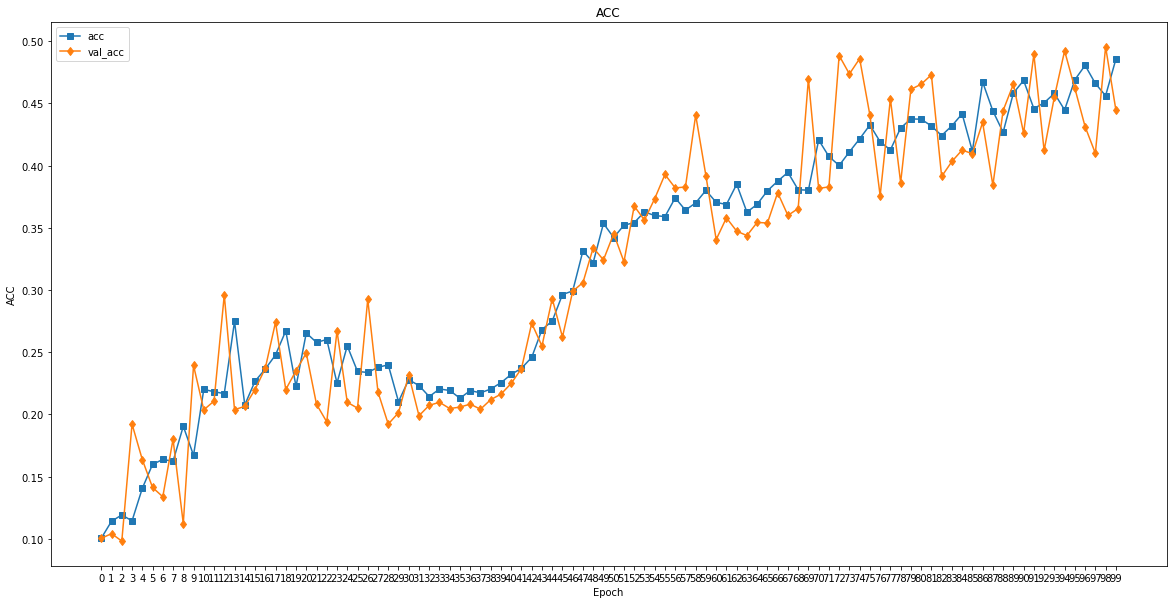

In [16]:
plt.figure(figsize=(20,10))

plt.plot(model_history.history['accuracy'],'s-',label='acc')
plt.plot(model_history.history['val_accuracy'],'d-',label='val_acc')


plt.legend(loc='best')
plt.xticks(np.arange(100))

plt.title('ACC')
plt.xlabel('Epoch')
plt.ylabel('ACC')
plt.show()
plt.close()

In [17]:
print('정규화 - ')

def fashion_mnist_normalization_model() :
  fashion_model = Sequential()
  fashion_model.add( Dense(units = 50, input_shape = (784, ) ) )
  fashion_model.add( BatchNormalization() )
  fashion_model.add( Activation('sigmoid') )

  fashion_model.add( Dense(units = 50) )
  fashion_model.add( BatchNormalization() )
  fashion_model.add( Activation('sigmoid') )

  fashion_model.add( Dense(units = 50) )
  fashion_model.add( BatchNormalization() )
  fashion_model.add( Activation('sigmoid') )

  fashion_model.add( Dense(units = 50) )
  fashion_model.add( BatchNormalization() )
  fashion_model.add( Activation('sigmoid') )

  fashion_model.add( Dense(units = 10 , activation = 'softmax') )

  fashion_model.compile(optimizer = SGD(learning_rate = 0.01), 
                      loss= 'categorical_crossentropy' , 
                      metrics=['accuracy'] ) 
  
  return fashion_model 

정규화 - 


In [ ]:
model          = fashion_mnist_normalization_model()
model_history = model.fit(X_train , y_train , epochs=100  , verbose = 1 , batch_size = 256 , validation_split = 0.3)

Epoch 1/100
165/165 [==============================] - 3s 14ms/step - loss: 1.8709 - accuracy: 0.5074 - val_loss: 2.1828 - val_accuracy: 0.3513
Epoch 2/100
 44/165 [=======>......................] - ETA: 1s - loss: 1.5730 - accuracy: 0.6737

In [ ]:
print('드롭아웃 - ')
print('배치정규화는 내부적으로 규제가 적용되어 있어서 드롭아웃을 적용할 필요가 없다 - ')

def fashion_mnist_dropout_model() :

  fashion_model = Sequential()
  fashion_model.add( Dense(units = 50, input_shape = (784, )  , kernel_initializer = 'he_normal') )
  # fashion_model.add( BatchNormalization() )
  fashion_model.add( Activation('sigmoid') )
  fashion_model.add( Dropout(0.2) )

  fashion_model.add( Dense(units = 50 ,  kernel_initializer = 'he_normal') )
  # fashion_model.add( BatchNormalization() )
  fashion_model.add( Activation('sigmoid') )
  fashion_model.add( Dropout(0.2) )


  fashion_model.add( Dense(units = 50 ,  kernel_initializer = 'he_normal') )
  #fashion_model.add( BatchNormalization() )
  fashion_model.add( Activation('sigmoid') )
  fashion_model.add( Dropout(0.2) )

  fashion_model.add( Dense(units = 50 , kernel_initializer = 'he_normal') )
  #fashion_model.add( BatchNormalization() )
  fashion_model.add( Activation('sigmoid') )
  fashion_model.add( Dropout(0.2) )

  fashion_model.add( Dense(units = 10 , activation = 'softmax' , kernel_initializer = 'he_normal') )

  fashion_model.compile(optimizer = SGD(learning_rate = 0.01), 
                      loss= 'categorical_crossentropy' , 
                      metrics=['accuracy'] ) 
  
  return fashion_model 

In [ ]:
model          = fashion_mnist_dropout_model()
model_history = model.fit(X_train , y_train , epochs=100  , verbose = 1 , batch_size = 256 , validation_split = 0.3)

#### 자연어 처리 

- 문자? -> ASCII 인코딩 'LISTEN' , 'SILENT' -> NN 입력으로 사용이 부적합


In [ ]:
print('단어 기반 인코딩 - ')
print()
sentences = [
  'I love my student' , 
  'I love my dog' , 
  'You love my dog?' ,   
  'toi hoc tieng Viet khong a'         
]

tokenizer = Tokenizer(num_words = 100 , oov_token='<OOV>')

# 단어기반 인덱싱
tokenizer.fit_on_texts(sentences)
# Bags of Words(BOW)
word_index = tokenizer.word_index


# 문장기반 인덱싱
sequences = tokenizer.texts_to_sequences(sentences)
padding   = pad_sequences(sequences , padding='pre' , maxlen = 5 , truncating = 'pre')


print(word_index)
print(sequences)
print(padding)
# test_sentences = [
#   'I love my son'            
# ]

# test_sequences = tokenizer.texts_to_sequences(sentences)
# print(test_sequences)

# 문장의 길이가 다른 경우 문장의 길이를 같은 길이로 만들어야 한다!!



In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
  -O /tmp/sarcasm.json

In [ ]:
import json

with open('/tmp/sarcasm.json' , 'r') as  f :
  datasets = json.load(f)

In [ ]:
sentences = []
target    = []
urls      = []

for row in datasets :
  sentences.append( row['headline']) 
  target.append( row['is_sarcastic'])

  urls.append(row['article_link'])


In [ ]:
sentences = np.array(sentences)
target    = np.array(target).reshape(-1,1)

In [ ]:
print( type(sentences) )
print( type(target))
print( sentences.shape )
print( target.shape)


In [ ]:
tokenizer = Tokenizer(oov_token='<OOV>')

# 단어기반 인덱싱
tokenizer.fit_on_texts(sentences)
# Bags of Words(BOW)
word_index = tokenizer.word_index


# 문장기반 인덱싱
sequences = tokenizer.texts_to_sequences(sentences)
padding   = pad_sequences(sequences , padding='post' , maxlen = 40 )


print(word_index )
print(sequences[0])
print(padding[0])
print(padding.shape)
print()
print(target)

In [ ]:
vocab_size = max(word_index.values()) +1
# vocab_size = 30000
embedding_dim = 40
max_length = 40 
nlp_model = Sequential()

nlp_model.add( Embedding(vocab_size , embedding_dim , input_length = max_length) )  
nlp_model.add( Dense(units = 6, activation  = 'relu' ) )
nlp_model.add( Dense(units = 1 , activation = 'sigmoid') )


In [ ]:
nlp_model.summary()

In [ ]:
nlp_model.compile(optimizer = 'adam' , 
                  loss = 'binary_crossentropy' , 
                  metrics = ['accuracy'])


In [ ]:
# print( padding.shape )
# print( target.shape)

nlp_model.fit(padding , target , epochs = 10 , verbose = 1)